In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load
import matplotlib.gridspec as gridspec


In [2]:
SCRIPTPATH = '/Users/marcosaponara/Documents/GitHub/centipede-bias/mysrc/utils/script2.py'

BETA = 0.063


In [3]:
!python $SCRIPTPATH --beta $BETA --nbsteps 4

dictionary saved successfully to file ./results/fig2-Z=100-nbstep=4-beta=0.063.pkl


In [4]:
!python $SCRIPTPATH --beta $BETA --nbsteps 6

dictionary saved successfully to file ./results/fig2-Z=100-nbstep=6-beta=0.063.pkl


In [5]:
!python $SCRIPTPATH --beta $BETA --nbsteps 8

/Users/marcosaponara/opt/anaconda3/lib/python3.9/site-packages/egttools/utils.py:214: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitute 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(
dictionary saved successfully to file ./results/fig2-Z=100-nbstep=8-beta=0.063.pkl


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


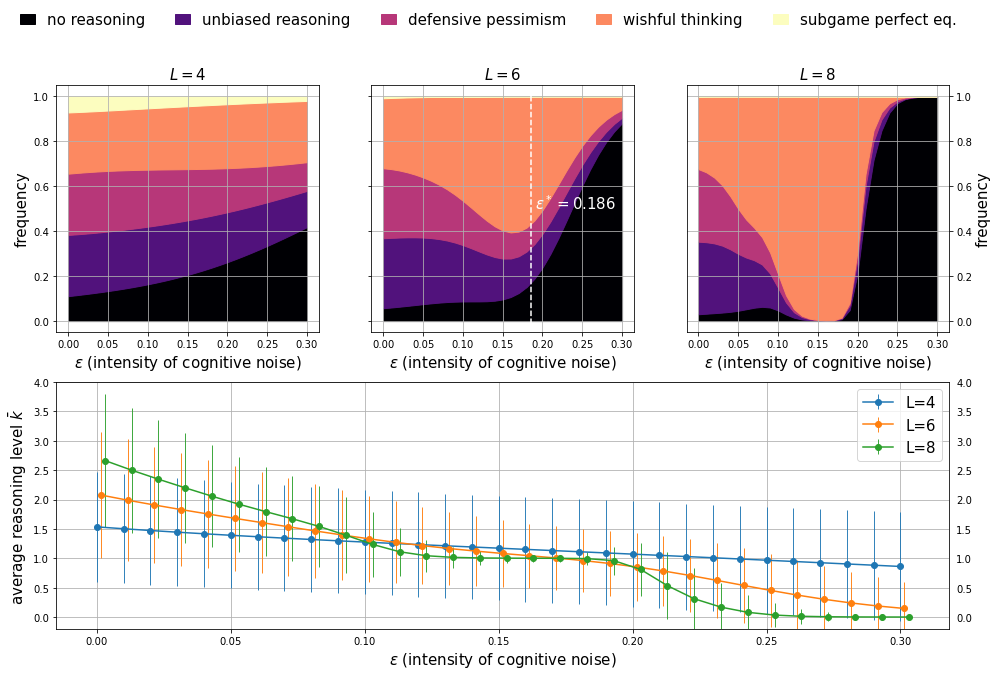

In [6]:
cmap = mpl.colormaps['magma']
colors = cmap(np.linspace(0, 1, 5))

Z=100
beta, eps_opt = 0.063, 0.186

# Create a figure
fig = plt.figure(figsize=(16, 10))

# Create a GridSpec layout
gs = gridspec.GridSpec(2, 3, figure=fig)

# First three plots in the top row
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
ax3 = fig.add_subplot(gs[0, 2])  # First row, third column

# One plot spanning the entire second row
ax4 = fig.add_subplot(gs[1, :])  # Second row, spanning all columns

axs = [ax1, ax2, ax3, ax4]


for n, nb_steps in enumerate([4,6,8]):
    file_name = f'results/fig2-Z=100-nbstep={nb_steps}-beta={beta}.pkl'
    with open(file_name, 'rb') as f:
        res = load(f)
    strategy_labels = res['strategy_labels']
    eps_values = res['eps_values']
    results_fig2 = res['results_fig2']
    
    
    nb_strategies = len(strategy_labels)
    
    idx_neu = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="neu"]
    idx_pes = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="pes"]
    idx_opt = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="opt"]
    
    cum_frequency0 = results_fig2[:,0]
    cum_frequency1 = cum_frequency0 + results_fig2[:,idx_neu].sum(axis=1)
    cum_frequency2 = cum_frequency1 + results_fig2[:,idx_pes].sum(axis=1)
    cum_frequency3 = cum_frequency2 + results_fig2[:,idx_opt].sum(axis=1)
    cum_frequency4 = cum_frequency3 + results_fig2[:,-1]
    
    assert np.allclose(cum_frequency4, 1.)
    
    axs[ n].set_title(r'$L=$'+str(nb_steps), fontsize=15)
    axs[ n].grid()
    axs[ n].fill_between(eps_values, 0, cum_frequency0, label='no reasoning', color=colors[0])
    axs[ n].fill_between(eps_values, cum_frequency0, cum_frequency1, label='unbiased reasoning', color=colors[1])
    axs[ n].fill_between(eps_values, cum_frequency1, cum_frequency2, label='defensive pessimism', color=colors[2])
    axs[ n].fill_between(eps_values, cum_frequency2, cum_frequency3, label='wishful thinking', color=colors[3])
    axs[ n].fill_between(eps_values, cum_frequency3, 1, label='subgame perfect eq.', color=colors[4])
    
    axs[ n].set_xlabel(r'$\epsilon$ (intensity of cognitive noise)', fontsize = 15)
    axs[ n].set_ylabel(r'frequency', fontsize = 15)
    axs[ n].set_ylim(-.05, 1.05)
    
    ####
    
    frequency_k = np.zeros((len(eps_values), nb_steps), dtype=float)
    
    frequency_k[:,0]=results_fig2[:,0]
    
    for k in range(1, nb_steps):
        frequency_k[:,k] = results_fig2[:,k:-1:(nb_steps-1)].sum(axis=1)
        
    ks = np.arange(nb_steps)
    avg_k = []
    std_k = []
    for i in range(len(eps_values)):
        freq = frequency_k[i,:]
        avg = np.sum(freq * ks)
        avg_k.append(avg)
        std_k.append(np.sqrt(np.sum(freq * (ks - avg)**2)))
    
    axs[3].errorbar(n*.0015+eps_values, avg_k, yerr=std_k, 
        label=r'L='+str(nb_steps), elinewidth=.9, marker='o', )

axs[3].grid()
axs[3].set_xlabel(r'$\epsilon$ (intensity of cognitive noise)', fontsize = 15)
axs[3].set_ylabel(r'average reasoning level $k$', fontsize = 15)
axs[3].set_ylim(-.2)
axs[3].legend(fontsize=15)
axs[3].tick_params(labelright = True)
axs[3].set_ylabel(r'average reasoning level $\bar{k}$', fontsize = 15)

axs[1].axvline(eps_opt, color='white', linestyle='--')
axs[1].text(eps_opt+0.005, .5, r'$\epsilon^*=$'+str(np.round(eps_opt,3)), color='white', fontsize=15)

    
fig.legend(['no reasoning','unbiased reasoning', 'defensive pessimism','wishful thinking', 'subgame perfect eq.'], 
           ncol = 5, loc='upper center', bbox_to_anchor=(0.5, 1.), fontsize = 15, frameon=False,handlelength=1)


axs[1].tick_params(labelleft = False)
axs[1].set(ylabel=None)

axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()


plt.savefig('./figures/icg-effect-of-eps.eps', format='eps')
plt.show()
